In [1]:
from pytorch_transformers import GPT2Tokenizer
from experiment import Intervention, Model
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = Model(output_attentions=True)

In [3]:
# Test experiment
base_sentence = "The doctor asked the nurse a question. {}"
intervention = Intervention(
        tokenizer,
        base_sentence,
        ["He", "She"],
        ["asked", "answered"])
candidate1_base_prob, candidate2_base_prob, candidate1_probs, candidate2_probs = model.attention_intervention_experiment(intervention)

100%|██████████| 12/12 [00:17<00:00,  1.46s/it]


#### Results
In each heatmap, rows correspond to layers and columns to heads. Each cell contains the odds ratio for the intervention of overriding the corresponding layer/head.

Base case:
	The doctor asked the nurse a question. He
Attention intervention:
	The doctor asked the nurse a question. She
Odds ratio: (p("ANSWERED"|intervention) / p("ASKED"|intervention)) / (p("ANSWERED") / p("ASKED"))


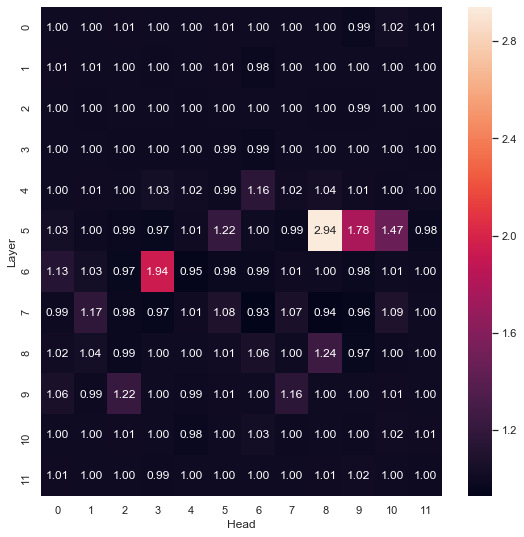

In [4]:
candidate1 = intervention.candidates[0][1:].upper()
candidate2 = intervention.candidates[1][1:].upper()

odds_base = candidate2_base_prob / candidate1_base_prob
odds_intervention = candidate2_probs / candidate1_probs
odds_ratio = odds_intervention / odds_base

print(f"Base case:\n\t{intervention.base_strings[0]}")
print(f"Attention intervention:\n\t{intervention.base_strings[1]}")
print(f'Odds ratio: (p("{candidate2}"|intervention) / p("{candidate1}"|intervention)) / (p("{candidate2}") / p("{candidate1}"))')

visualize = True
if visualize:
    plt.figure(figsize=(9,9)) 
    ax = sns.heatmap(odds_ratio, annot=True, annot_kws={"size": 12}, fmt=".2f")
    # ax.set_title("Attention Intervention Odds Ratio")
    ax.set(xlabel='Head', ylabel='Layer')
else:
    torch.set_printoptions(precision=1, sci_mode=False)
    print(odds_ratio)
